In [13]:
import sys
import cmath
import math
import os

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
from libra_py import probabilities as prb

import matplotlib.pyplot as plt   # plots
import numpy as np
#from matplotlib.mlab import griddata
from scipy.interpolate import griddata

%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24",
              "11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24",
              "11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"
             ]

In [19]:
T = []
t, dT = 100, 50.0

while t<=2000.0:
    T.append(t)
    t = t + dT
    
print(T)

[100, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0, 1050.0, 1100.0, 1150.0, 1200.0, 1250.0, 1300.0, 1350.0, 1400.0, 1450.0, 1500.0, 1550.0, 1600.0, 1650.0, 1700.0, 1750.0, 1800.0, 1850.0, 1900.0, 1950.0, 2000.0]


In [26]:
Pq, Pc = [], []

dE = [0.0001, 0.001]

for de in dE:
    
    pq, pc = [], []
    for t in T:        
        pq.append( math.exp(-de/(units.kB * t) )  )
        pc.append( prb.Boltz_cl_prob_up(de, t) )
        
        #P01 = prb.Boltz_quant_prob([0,de], t)[1]/prb.Boltz_quant_prob([0,de], t)[0]  # P0/P1        
        #P01 = prb.Boltz_cl_prob_up(de, t) / prb.Boltz_cl_prob_up(0.0, t)
        
    Pq.append(pq)
    Pc.append(pc)

print(Pq)
print(Pc)

[[0.7292237497935543, 0.8101657321105971, 0.8539459876324464, 0.8813417059146949, 0.9000920686855302, 0.9137289241194803, 0.9240919800714896, 0.9322333237717371, 0.9387980112434703, 0.9442034888654914, 0.9487318212674908, 0.9525804458065653, 0.9558916905797854, 0.9587707450437898, 0.9612970300960518, 0.9635316325115, 0.9655223062010204, 0.9673069212077788, 0.9689158948244528, 0.9703739388391076, 0.9717013372767845, 0.972914895505508, 0.974028655259942, 0.9750544402744805, 0.9760022775621814, 0.9768807261928208, 0.9776971364281403, 0.9784578558373088, 0.9791683946307651, 0.979833559325379, 0.9804575615986915, 0.9810441075437981, 0.9815964713218461, 0.9821175563039499, 0.9826099461134211, 0.9830759474624777, 0.9835176262822029, 0.9839368383396272, 0.9843352552989519], [0.04252144804299174, 0.12182563875973167, 0.20620729386467332, 0.2827764371676749, 0.3490352972977542, 0.40567078024081515, 0.45410053277294593, 0.49573117635590763, 0.5317672772629723, 0.5631913920397793, 0.59079209312392

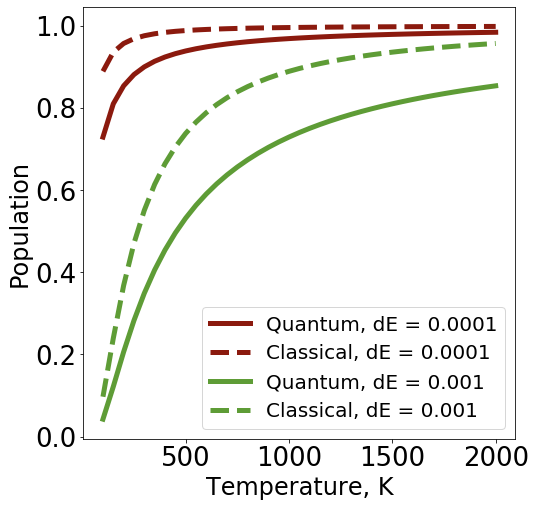

In [27]:
plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=24)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=26)     # fontsize of the tick labels
plt.rc('ytick', labelsize=26)     # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)



plt.figure(1, figsize=(8, 8)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
#plt.title(F'dE = {de}')
plt.xlabel('Temperature, K')
plt.ylabel('Population')
for i, de in enumerate(dE):
    plt.plot(T, Pq[i], markersize=20, label=F'Quantum, dE = {de}', linewidth=5, color = colors[clrs_index[i]])     
    plt.plot(T, Pc[i], '--', markersize=20, label=F'Classical, dE = {de}', linewidth=5, color = colors[clrs_index[i]])     
plt.legend()

plt.savefig("fig.png", dpi=300)